# Terrorist Dataset

Lets import all the necessary libraries

In [1]:
import pandas as pd
import gc 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
import os
import psutil
import time
gc.enable()

/home/miriyalamanideep92/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miriyalamanideep92/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
process = psutil.Process(os.getpid())
memused = process.memory_info().rss
print('Total memory in use before reading data: {:.02f} GB '
      ''.format(memused / (2 ** 30)))

Total memory in use before reading data: 0.11 GB 


Importing the data in CSV as it occupies less memory and load faster compared to xlsx

In [3]:
Data = pd.read_csv("globalterrorismdb.csv",encoding='ISO-8859-1',low_memory=False)

In [4]:
memused = process.memory_info().rss
print('Total memory in use after reading data: {:.02f} GB '
      ''.format(memused / (2 ** 30)))

Total memory in use after reading data: 0.55 GB 


# Preprocessing the dataset

In [5]:
missing = Data.isnull().sum()
missing.head()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    162886
dtype: int64

In [6]:
missing = missing[missing > 100000]
missing.sort_values(inplace=True)
missing.head(10)

scite2             100765
propextent         109805
propextent_txt     109805
propcomment        115919
motive             121764
location           122376
scite3             131133
propvalue          134863
alternative        143719
alternative_txt    143719
dtype: int64

In [7]:
missing.value_counts().sum()

76

In [8]:
#Dropping the columns with missing values more than 100,000 rows
Data.drop(missing[missing>100000].index,axis=1,inplace=True)

In [9]:
#Dropping the text columns of few features as we already have their corresponding encodings
Data.drop(['country_txt','region_txt','attacktype1_txt',
           'targtype1_txt','natlty1_txt','targsubtype1_txt','weaptype1_txt','weapsubtype1_txt'],axis=1,inplace=True)

In [10]:
Categ = [f for f in Data.columns if Data.dtypes[f] == 'object']
Categ

['provstate',
 'city',
 'summary',
 'corp1',
 'target1',
 'gname',
 'weapdetail',
 'scite1',
 'dbsource']

In [11]:
#Encoding the remaining categorical features
x=Data[Categ].apply(lambda x: pd.factorize(x)[0])

In [12]:
x['eventid']=Data['eventid']

In [13]:
Data.drop(Categ,axis=1,inplace=True)

In [14]:
Data.shape

(170350, 42)

In [15]:
Data_final = Data.merge(x, on='eventid', how='left')

In [16]:
Data_final.head(10)

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,INT_ANY,provstate,city,summary,corp1,target1,gname,weapdetail,scite1,dbsource
0,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,0,-1,0,-1,-1,0,0,-1,-1,0
1,197000000002,1970,0,0,0,130,1,19.432608,-99.133207,1.0,...,1,-1,1,-1,0,1,1,-1,-1,0
2,197001000001,1970,1,0,0,160,5,15.478598,120.599741,4.0,...,1,0,2,-1,1,2,2,-1,-1,0
3,197001000002,1970,1,0,0,78,8,37.983773,23.728157,1.0,...,1,1,3,-1,-1,3,2,0,-1,0
4,197001000003,1970,1,0,0,101,4,33.580412,130.396361,1.0,...,1,-1,4,-1,-1,4,2,1,-1,0
5,197001010002,1970,1,1,0,217,1,37.005105,-89.176269,1.0,...,-9,2,5,0,2,5,3,2,0,1
6,197001020001,1970,1,2,0,218,3,-34.891151,-56.187214,1.0,...,0,3,6,-1,3,6,4,3,-1,0
7,197001020002,1970,1,2,0,217,1,37.805065,-122.273024,1.0,...,-9,4,7,1,4,7,2,-1,1,1
8,197001020003,1970,1,2,0,217,1,43.076592,-89.412488,1.0,...,0,5,8,2,5,8,5,4,2,1
9,197001030001,1970,1,3,0,217,1,43.072950,-89.386694,1.0,...,0,5,8,3,6,9,5,5,1,1


In [17]:
Data_final=Data_final.fillna(Data_final.mode().iloc[0])

In [18]:
Data_final.shape

(170350, 51)

In [19]:
del Data,x,Categ
gc.collect()

96

Appending the rows of the Classes which have only 1 row to the dataset

In [20]:
z=Data_final['gname'].value_counts().to_frame()
M=z['gname'][z['gname']==1]
M=M.to_frame()
M['groupname']=M.index

In [21]:
a=Data_final

In [22]:
#appending 4 times
for i in M['groupname']:
    A=Data_final['gname']==i
    df=Data_final[A]
    a=a.append([df]*4,ignore_index=True)

In [23]:
a.shape

(177122, 51)

In [24]:
a.tail(10)

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,INT_ANY,provstate,city,summary,corp1,target1,gname,weapdetail,scite1,dbsource
177112,197010080006,1970,10,8,0,362,8,48.777106,9.180769,1.0,...,1,78,198,-1,-1,462,74,0,-1,0
177113,197010080006,1970,10,8,0,362,8,48.777106,9.180769,1.0,...,1,78,198,-1,-1,462,74,0,-1,0
177114,199606160007,1996,6,16,1,205,5,33.300000,-77.042791,5.0,...,1,1109,2,-1,1470,24455,2123,81,-1,0
177115,199606160007,1996,6,16,1,205,5,33.300000,-77.042791,5.0,...,1,1109,2,-1,1470,24455,2123,81,-1,0
177116,199606160007,1996,6,16,1,205,5,33.300000,-77.042791,5.0,...,1,1109,2,-1,1470,24455,2123,81,-1,0
177117,199606160007,1996,6,16,1,205,5,33.300000,-77.042791,5.0,...,1,1109,2,-1,1470,24455,2123,81,-1,0
177118,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,0,-1,0,-1,-1,0,0,-1,-1,0
177119,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,0,-1,0,-1,-1,0,0,-1,-1,0
177120,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,0,-1,0,-1,-1,0,0,-1,-1,0
177121,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,0,-1,0,-1,-1,0,0,-1,-1,0


In [25]:
Data_final=a

In [26]:
del M,z,A,df,a
gc.collect()

186

# Model selection

In [27]:
y=Data_final['gname']

In [28]:
X=Data_final.drop(['gname'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state=42)

In [30]:
#from sklearn.model_selection import GridSearchCV
#param_grid = { 'n_estimators': [10,20,30],'max_features': ['auto','log2'] }
#forest = RandomForestClassifier()
#grid_search = GridSearchCV(forest, param_grid, cv=5,n_jobs=8)
#grid_search.fit(X_train, y_train)
#print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
#print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

In [31]:
forest = RandomForestClassifier(n_estimators=50,n_jobs =-1,random_state=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [32]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [33]:
dic ={}
a =list(X.columns)
for i in range(len(a)):
    dic[i]=a[i]

Feature ranking:
1. feature INT_LOG (0.100440)
2. feature INT_IDEO (0.095312)
3. feature country (0.074676)
4. feature longitude (0.073547)
5. feature latitude (0.071223)
6. feature INT_ANY (0.065551)
7. feature natlty1 (0.059593)
8. feature eventid (0.044205)
9. feature provstate (0.035047)
10. feature region (0.034893)
11. feature iyear (0.025625)
12. feature target1 (0.024661)
13. feature city (0.024549)
14. feature targsubtype1 (0.019463)
15. feature iday (0.018400)
16. feature corp1 (0.017658)
17. feature scite1 (0.017592)
18. feature summary (0.016965)
19. feature imonth (0.016470)
20. feature targtype1 (0.013757)
21. feature weapdetail (0.013224)
22. feature guncertain1 (0.012204)
23. feature claimed (0.011898)
24. feature weapsubtype1 (0.011451)
25. feature nkill (0.010642)
26. feature attacktype1 (0.010628)
27. feature dbsource (0.010250)
28. feature weaptype1 (0.008278)
29. feature nwound (0.007479)
30. feature doubtterr (0.007392)
31. feature nperps (0.007107)
32. feature IN

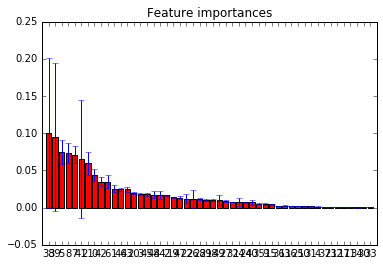

In [42]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, dic[int(indices[f])], importances[indices[f]]))

# Plotting the feature importances of the forest    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [35]:
l=[]
for i in range(30):
    l.append(dic[indices[-i-1]])

In [36]:
l

['nwoundus',
 'nkillus',
 'nwoundte',
 'crit1',
 'suicide',
 'crit2',
 'individual',
 'ransom',
 'extended',
 'nkillter',
 'vicinity',
 'success',
 'nperpcap',
 'crit3',
 'ishostkid',
 'multiple',
 'specificity',
 'property',
 'INT_MISC',
 'nperps',
 'nwound',
 'doubtterr',
 'weaptype1',
 'nkill',
 'attacktype1',
 'guncertain1',
 'dbsource',
 'weapsubtype1',
 'claimed',
 'weapdetail']

# Evaluation metrics

In [37]:
from sklearn.metrics import accuracy_score, auc, roc_curve
y_pred =forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.9068675052505589

In [38]:
from sklearn.metrics import classification_report
from scipy import interp
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelBinarizer

A function which outputs roc-auc for each class along with precision, recall

In [39]:
def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [40]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=y_pred, 
    y_score=forest.predict_proba(X_test))

/home/miriyalamanideep92/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
report_with_auc.tail()

,precision,recall,f1-score,support,pred,AUC
3450,1.000000,1.000000,1.000000,1.0,1.0,0.499819
3451,1.000000,1.000000,1.000000,1.0,1.0,0.499706
3452,1.000000,1.000000,1.000000,1.0,1.0,0.498927
3453,1.000000,1.000000,1.000000,1.0,1.0,0.499955
avg / total,0.887201,0.906868,0.891014,43319.0,43319.0,0.989028


In [42]:
#import xgboost as xgb
#X.drop(l,axis=1,inplace= True)
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state=42)

In [43]:
#X_train1=X_train.values
#y_train1=y_train.values
#X_test1=X_test.values
#y_test1=y_test.values

In [44]:
#xgb_model = xgb.XGBClassifier( learning_rate=0.2,
 #   objective='multi:softmax')
#xgb_model.fit(X_train1, y_train1, eval_metric='mlogloss')
#predictions = xgb_model.predict(X_test1)
#actuals = y_test1
#accuracy_score(actuals, predictions)